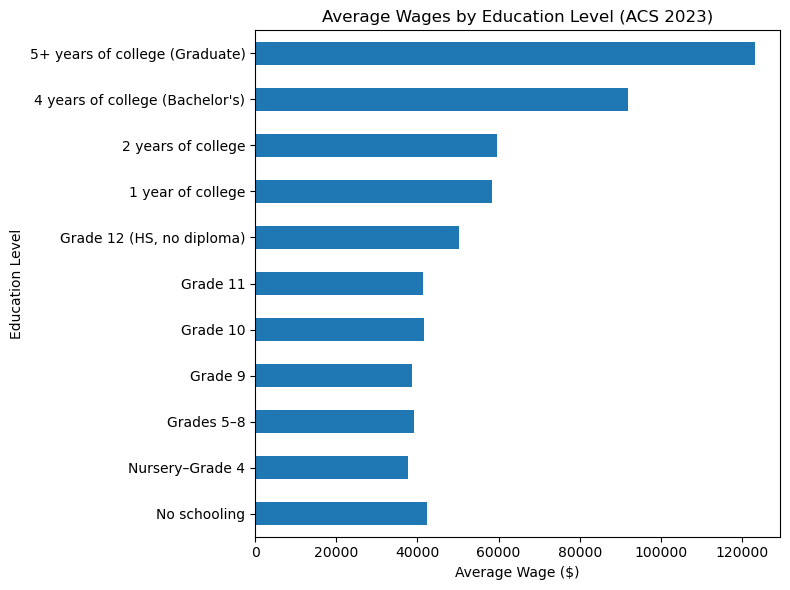

In [12]:
# Step 1: import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: load the ACS dataset
df = pd.read_csv("data/raw/acs_2023.gz", low_memory=False)

# Step 3: filter to working adults
df = df[(df['AGE'] >= 25) & (df['AGE'] <= 64)]   # ages 25–64
df = df[df['EMPSTAT'] == 1]                      # employed only
df = df[df['INCWAGE'] > 0]                       # positive wage
df['ln_wage'] = np.log(df['INCWAGE'])            # log wages

# Step 4: make education labels
edu_labels = {
    0: "No schooling",
    1: "Nursery–Grade 4",
    2: "Grades 5–8",
    3: "Grade 9",
    4: "Grade 10",
    5: "Grade 11",
    6: "Grade 12 (HS, no diploma)",
    7: "1 year of college",
    8: "2 years of college",
    9: "3 years of college",
    10: "4 years of college (Bachelor's)",
    11: "5+ years of college (Graduate)",
    99: "Missing"
}

edu_order = [
    "No schooling",
    "Nursery–Grade 4",
    "Grades 5–8",
    "Grade 9",
    "Grade 10",
    "Grade 11",
    "Grade 12 (HS, no diploma)",
    "1 year of college",
    "2 years of college",
    "3 years of college",
    "4 years of college (Bachelor's)",
    "5+ years of college (Graduate)",
    "Missing"
]

df['EDUC_label'] = df['EDUC'].map(edu_labels)

df['EDUC_label'] = pd.Categorical(df['EDUC_label'],
                                  categories=edu_order,
                                  ordered=True)

# Step 5: calculate average wages by education
edu_avg = df.groupby('EDUC_label', observed = True)['INCWAGE'].mean()

# Step 6: plot
edu_avg.plot(kind='barh', figsize=(8,6))
plt.xlabel("Average Wage ($)")
plt.ylabel("Education Level")
plt.title("Average Wages by Education Level (ACS 2023)")
plt.tight_layout()
plt.show()
